In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings('ignore')

In [17]:
data=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\Dataset\Electricity_Monthly_Aus TS.csv")
data

,x,Date
0,7366,01-01-2006
1,7414,01-02-2006
2,7824,01-03-2006
3,7524,01-04-2006
4,8279,01-05-2006
...,...,...
183,13032,01-04-2021
184,14268,01-05-2021
185,14473,01-06-2021
186,15359,01-07-2021


In [19]:
data.isna().sum()

x       0
Date    0
dtype: int64

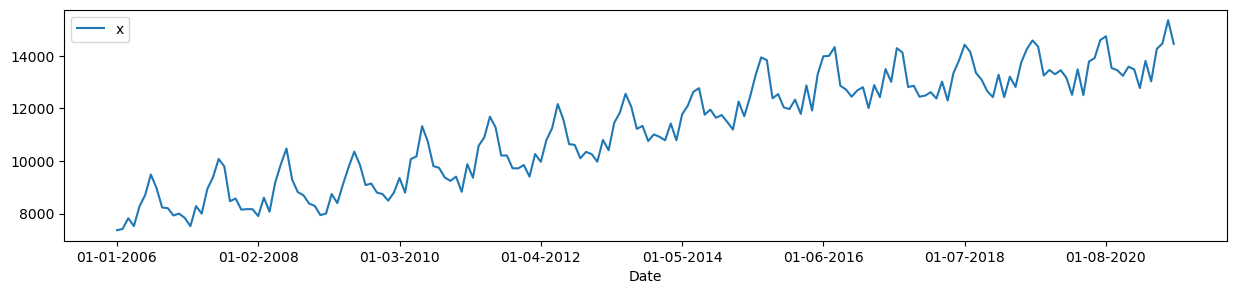

In [21]:
data.plot.line(x = 'Date',y = 'x',figsize=(15,3))
plt.show()  

In [23]:
data2 = data.set_index("Date")
data2.head()

,x
Date,
01-01-2006,7366
01-02-2006,7414
01-03-2006,7824
01-04-2006,7524
01-05-2006,8279


In [25]:
model2 = ExponentialSmoothing(data2,trend='add',seasonal='mul',seasonal_periods=12).fit()
model2.params

{'smoothing_level': 0.21714285449490556,
 'smoothing_trend': 0.033406592591839056,
 'smoothing_seasonal': 0.4070857202449994,
 'damping_trend': nan,
 'initial_level': 8109.002766963933,
 'initial_trend': 44.71757366339617,
 'initial_seasons': array([0.92551198, 0.91025773, 0.98154666, 0.93290818, 1.03918953,
        1.08954956, 1.16734928, 1.09817045, 0.99373693, 0.99049071,
        0.94813518, 0.94304364]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [27]:
data2["Level"] = round(model2.level)
data2["Trend"] = round(model2.trend)
data2["Seasonal"] = round(model2.season)
data2["Forecast"] = round(model2.fittedvalues)
data2.head()

,x,Level,Trend,Seasonal,Forecast
Date,,,,,
01-01-2006,7366,8111.0,43.0,1.0,7546.0
01-02-2006,7414,8153.0,43.0,1.0,7423.0
01-03-2006,7824,8147.0,42.0,1.0,8045.0
01-04-2006,7524,8162.0,41.0,1.0,7639.0
01-05-2006,8279,8151.0,39.0,1.0,8524.0


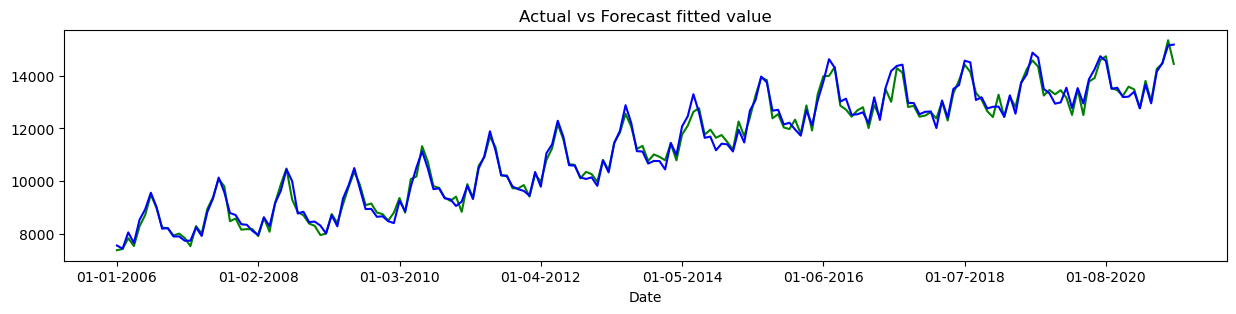

In [31]:
plt.title("Actual vs Forecast fitted value")
data2.x.plot(color='green')
data2.Forecast.plot( color='blue',figsize=(15,3))
plt.show()

In [33]:
Forecast2 = np.round(model2.forecast(36),2)
Forecast2

188    13847.40
189    13834.28
190    13551.22
191    13696.62
192    13681.28
193    12983.69
194    13957.82
195    13170.26
196    14385.66
197    14642.77
198    15406.24
199    15308.42
200    14100.19
201    14086.45
202    13797.85
203    13945.53
204    13929.53
205    13218.93
206    14210.32
207    13408.15
208    14645.12
209    14906.47
210    15683.27
211    15583.29
212    14352.98
213    14338.62
214    14044.49
215    14194.43
216    14177.78
217    13454.16
218    14462.83
219    13646.05
220    14904.59
221    15170.18
222    15960.31
223    15858.15
dtype: float64

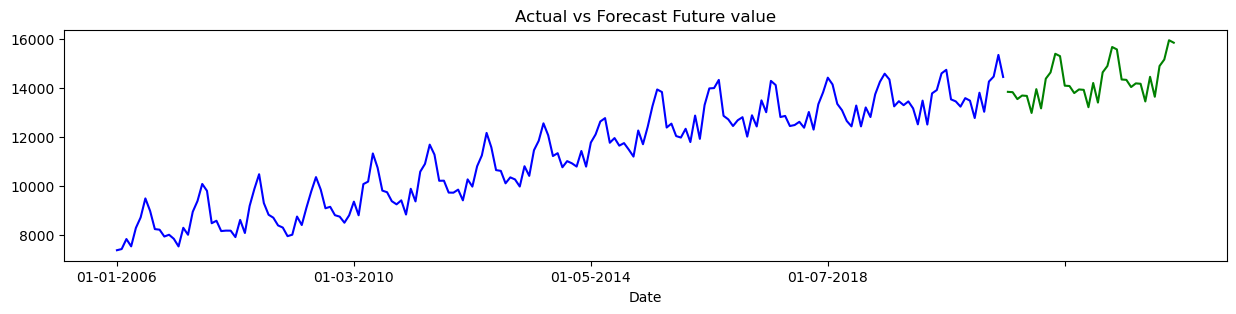

In [35]:
plt.title("Actual vs Forecast Future value")
Forecast2.plot(color='green')
data2.x.plot(color='blue',figsize=(15,3))
plt.show()

In [37]:
mean_absolute_percentage_error = np.mean(np.abs(data2.x - data2.Forecast)/np.abs(data2.x))*100
mean_absolute_percentage_error

1.554457259287907